# EDA
---

### 1. Problema de Negocio:
+  Se necesita desarrollar un modelo de machine learning, para satisfacer la necesidad de tener un sistema de recomendacion de peliculas, que puede tener diverssas finalidades. Como Data Scientist mi rol es determinal cual es la manera mas efectiva y eficiente de entregar un mvp, de acuerdo a la problematica. Primero es necesario determinar que datos son los mas apropiados para el modelo de recomendacion.
#### **`¿Que lista de peliculas son las mas recomendables a partir de una pelicula?`**

### 2. El set de datos despues de la limpieza
+  La informacion disponible se encuentra en un archivo csv(Dataset_For_Eda) con 45451 filas y 23 columnas.
+  Cada registro tiene 23 caracteristicas:

    1. **`"belongs_to_collection"`**:Un diccionario que indica a que franquicia o serie de películas pertenece la película.
    2. **`"budget"`**:El presupuesto de la película, en dólares(int)
    3. **`"genres"`**:Un diccionario que indica todos los géneros asociados a la película.(Dict)
    4. **`"id"`**: ID de la pelicula.(Int)
    5. **`"original_language"`**: Idioma original en la que se grabo la pelicula.(Object)
    6. **`"overview"`**: Pequeño resumen de la película.(Object)
    7. **`"populrity"`**: Puntaje de popularidad de la película, asignado por TMDB (TheMoviesDataBase).(Float)
    8. **`"production_companies"`**: Lista con las compañias productoras asociadas a la película.(list)
    9. **`"production_countries"`**: Lista con los países donde se produjo la película.(list)
    10. **`"release_date"`**: Fecha de estreno de la película.(Object)
    11. **`"revenue"`**:Recaudación de la pelicula, en dolares.(Float)
    12. **`"runtime"`**: Duración de la película, en minutos.(Float)
    13. **`"spoken_languages"`**: Lista con los idiomas que se hablan en la pelicula.(Object)
    14. **`"status"`**: Estado de la pelicula actual (si fue anunciada, si ya se estreno, etc).(Object)
    15. **`"tagline"`**: Frase celebre asociada la pelicula.(Object)
    16. **`"title"`**: Titulo de la pelicula.(Object)
    17. **`"vote_average"`**: Puntaje promedio de reseñas de la pelicula.(Float)
    18. **`"vote_count"`**: Numeros de votos recibidos por la pelicula, en TMDB.(Int)
    19. **`"name_genre"`**: lista filtrada de los Generos relacionados con la pelicula.(Object)
    20. **`"Collections"`**: Nombre de la coleccion a la que pertenece.(Object)
    21. **`"release_year"`**: Año de estreno(Object)
    22. **`"return"`**: Roi, retorno de inversion de la pelicula.(Int)
    23. **`"director"`**: Director de la pelicula.(Object)

### 3. Lectura del Dataset:

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
Eda_dataset=pd.read_csv('Dataset/Dataset_For_Eda.csv')

##### A simple vista, ciertos campos no aportan ninguna informacion para predecir la lista o por lo menos no tan significativamente, dado que se requiere un MVP(Minimal Viable proyect). las Columnas son: budget, belongs_to_collection, orifinal_language, release_date, status, tagline, Collections, release_year,return, director,overview,revenue,runtime,spoken_languagues,genres.
+ #### Se eliminaron por:
    1. **`"belongs_to_collection"`**: el 85% de la columna son nulos y no es tan significativa la informacion que aporta para el modelo.
    2. **`"original_language"`**: Es irrelevante al modelo, ya que no determina en gran medida la recomendacion.
    3. **`"release_date"`**: Es irrelevante al modelo, ya que no determina en gran medida la recomendacion.
    4. **`"status"`**: Es irrelevante al modelo, ya que no determina en gran medida la recomendacion.
    5. **`"tagline"`**: Es irrelevante al modelo, ya que no determina en gran medida la recomendacion.
    6. **`"Collections"`**: Es irrelevante al modelo, ya que no determina en gran medida la recomendacion.
    7. **`"release_year"`**: Es irrelevante al modelo, ya que no determina en gran medida la recomendacion.
    8. **`"return"`**: Podria ser util, pero para el MVP decidi optar por otro enfoque.
    9. **`"director"`**: Podria ser util, pero para el MVP decidi optar por otro enfoque.
    10. **`"overview"`**: Aportaria mucha informacion, pero es un dato un variable, y se va del alcance para el MVP.
    11. **`"revenue"`**: Podria ser util, pero para el MVP decidi optar por otro enfoque.
    12. **`"runtime"`**: Podria ser util, pero para el MVP decidi optar por otro enfoque.
    13. **`"spoken_languages"`**: Es irrelevante al modelo, ya que no determina en gran medida la recomendacion.
    14. **`"genres"`**: Se creo una columna con una mejor estructura y con la misma informacion.

In [17]:
Eda_dataset.drop(['belongs_to_collection', 'original_language', 'release_date', 'status', 'tagline', 'Collections', 'release_year', 'return', 'director', 'overview', 'revenue', 'runtime', 'spoken_languages', 'genres'], axis=1, inplace=True)

In [18]:
Eda_dataset

,budget,id,popularity,production_companies,production_countries,title,vote_average,vote_count,name_genre
0,30000000.0,862,21.946943,['Pixar Animation Studios'],"[{'iso_3166_1': 'US', 'name': 'United States o...",Toy Story,7.7,5415.0,"Animation,Comedy,Family"
1,65000000.0,8844,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...","[{'iso_3166_1': 'US', 'name': 'United States o...",Jumanji,6.9,2413.0,"Adventure,Fantasy,Family"
2,0.0,15602,11.712900,"['Warner Bros.', 'Lancaster Gate']","[{'iso_3166_1': 'US', 'name': 'United States o...",Grumpier Old Men,6.5,92.0,"Romance,Comedy"
3,16000000.0,31357,3.859495,['Twentieth Century Fox Film Corporation'],"[{'iso_3166_1': 'US', 'name': 'United States o...",Waiting to Exhale,6.1,34.0,"Comedy,Drama,Romance"
4,0.0,11862,8.387519,"['Sandollar Productions', 'Touchstone Pictures']","[{'iso_3166_1': 'US', 'name': 'United States o...",Father of the Bride Part II,5.7,173.0,Comedy
...,...,...,...,...,...,...,...,...,...
45446,0.0,30840,5.683753,"['Westdeutscher Rundfunk (WDR)', 'Working Titl...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",Robin Hood,5.7,26.0,"Drama,Action,Romance"
45447,0.0,111109,0.178241,['Sine Olivia'],"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",Century of Birthing,9.0,3.0,Drama
45448,0.0,67758,0.903007,['American World Pictures'],"[{'iso_3166_1': 'US', 'name': 'United States o...",Betrayal,3.8,6.0,"Action,Drama,Thriller"
45449,0.0,227506,0.003503,['Yermoliev'],"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",Satan Triumphant,0.0,0.0,NaN


### 4. Analisis Exploratorio
##### La idea es utilizar herramientas estadisticas y de visualizacion para:
+ Crear un mapa mental del set de datos (entenderlo)
+ Empezar a encontrar respuestas a la pregunta planteada inicialmente (**`"¿Que lista de peliculas son las mas recomendables a partir de una pelicula?"`**)

Llevare a cabo estas fases:
1. Analisis de cada variable de Manera **`individual`**.
2. Analisis univariado: relacion de cada  **`variable predictora`** con la variable **`target`**.
3. Analisis bivariado: relacion de **`pares`** de **`variables predictoras`** con la variable target.

### 4.1 Analisis de cada variable de manera individual

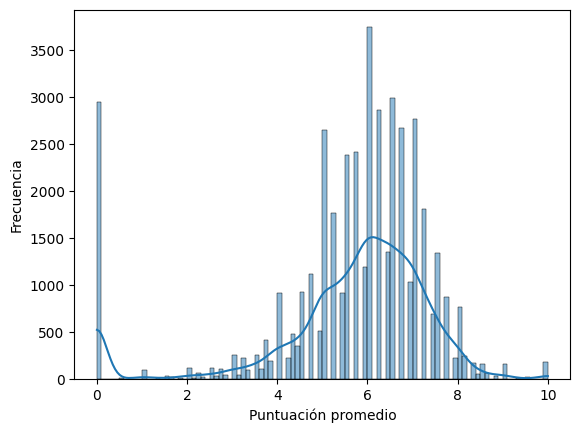

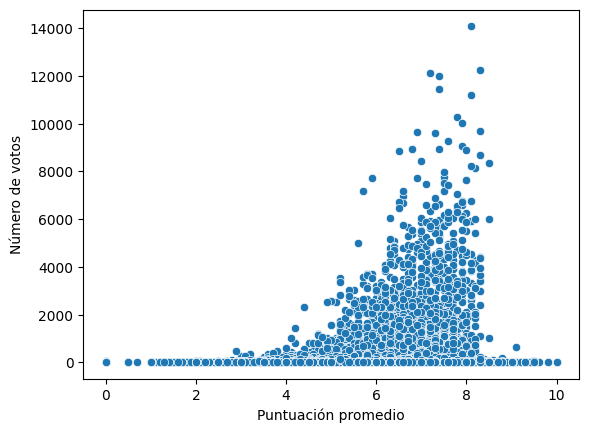

In [19]:
# Histograma de una variable numérica
sns.histplot(Eda_dataset['vote_average'], kde=True)
plt.xlabel('Puntuación promedio')
plt.ylabel('Frecuencia')
plt.show()
# Diagrama de dispersión de dos variables numéricas
sns.scatterplot(x='vote_average', y='vote_count', data=Eda_dataset)
plt.xlabel('Puntuación promedio')
plt.ylabel('Número de votos')
plt.show()

Drama              20302
Comedy             13195
Thriller            7635
Romance             6744
Action              6603
Horror              4676
Crime               4312
Documentary         3926
Adventure           3506
Science Fiction     3054
Family              2774
Mystery             2474
Fantasy             2322
Animation           1942
Foreign             1627
Music               1600
History             1397
War                 1325
Western             1042
TV Movie             768
dtype: int64


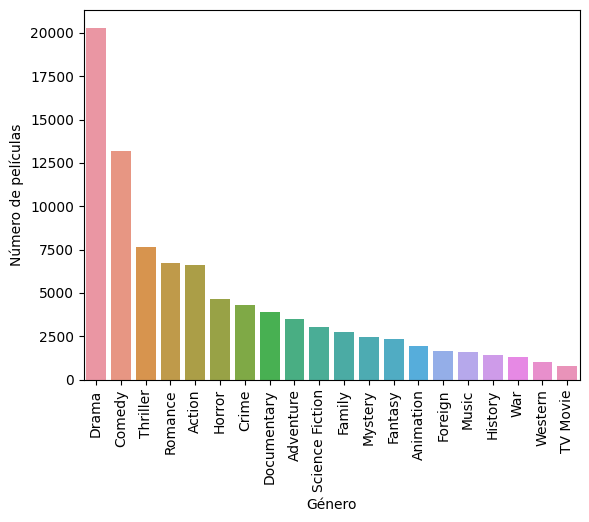

In [20]:
# Obtener las características de género
genre_counts = Eda_dataset['name_genre'].str.get_dummies(',').sum()
genre_counts.sort_values(ascending=False, inplace=True)
print(genre_counts)

# Visualizar las características de género
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel('Género')
plt.ylabel('Número de películas')
plt.xticks(rotation=90)
plt.show()
